### Prophat

- https://gorakgarak.tistory.com/1255


In [33]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
from pandas.tseries.offsets import Day, Hour, Minute, Second
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

In [34]:
df = pd.read_csv('data\\all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [35]:
df.describe()  # 해다 데이터의 통계치

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [36]:
df = df.rename(columns={'Name' : 'Ticks'}) # Name을 Tick으로 리네임
df.head()

,date,open,high,low,close,volume,Ticks
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [37]:
# 아마존 주식 분석
amzn = df.loc[df['Ticks'] == 'AMZN']
amzn.head()

,date,open,high,low,close,volume,Ticks
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [38]:
amzn.info() # date가 object type인지 date type인지 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 46387 to 47645
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Ticks   1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [39]:
amzn.head() # change to dateformat

,date,open,high,low,close,volume,Ticks
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [40]:
# Create a copy to avoid the SerringWarning .loc issue
amzn_df = amzn.copy()

# Change to datetime datatype.
amzn_df.loc[:, 'date'] = pd.to_datetime(amzn.loc[:, 'date'], format="%Y/%m/%d")

amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 46387 to 47645
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Ticks   1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


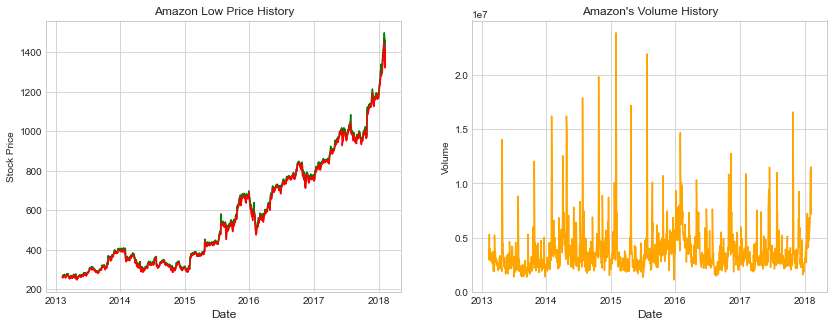

In [41]:
# Simple plotting of Amazon Stock Price
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))   # 2개의 그래프 만들어라~
ax1.plot(amzn_df["date"], amzn_df["close"])    # x축은 date, y축은 close로 plot 그리기
ax1.set_xlabel('Date', fontsize=12)    # x축 이름은 Date
ax1.set_ylabel('Stock Price')          # y축 이름은 Stock Price
ax1.set_title("Amazon Close Price History")  # 표 이름은 amazon close price history

# Second Subplot
ax1.plot(amzn_df['date'], amzn_df['high'], color='green') # x축은 date, y축은 고점, 색깔은 green
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel('Stock Price')
ax1.set_title("Amazon High Price History")

# Third Subplot
ax1.plot(amzn_df["date"], amzn_df["low"], color='red')    # x축은 date, y축은 저점, 색깔은 red
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel('Stock Price')
ax1.set_title("Amazon Low Price History")

# Fourth Subplot
ax2.plot(amzn_df['date'], amzn_df['volume'], color = 'orange')  # ax2에서 x축은 date, y축은 volume, 색깔은 orange
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Volume")
ax2.set_title("Amazon's Volume History")
plt.show()

### Prophet
- facebook's library for time series forecasting
- seasonality에 높은 영향을 받음(전기세, 식당 방문객 등) 

#### Steps
- Make sure you replace closing price for y and date for ds.
- Fit that dataframe to Prophet in order to detect future patterns.
- Predict the upper and lower prices of the closing price.



In [42]:
m = Prophet()

# Drop the columns
ph_df = amzn_df.drop(['open', 'high', 'low', 'volume', 'Ticks'], axis = 1)  # open, high, low, volumn, Ticks 열 빼기
ph_df.rename(columns = {"close" : 'y', 'date' : 'ds'}, inplace =True)  # date는 ds, close는 y로 이름 바꾸기
ph_df.head()

,ds,y
46387,2013-02-08,261.95
46388,2013-02-11,257.21
46389,2013-02-12,258.70
46390,2013-02-13,269.47
46391,2013-02-14,269.24


In [43]:
m.fit(ph_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
# Create future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1619,2019-02-03,1740.081576,1415.471404,2103.163922
1620,2019-02-04,1720.516828,1402.941691,2085.356662
1621,2019-02-05,1719.934192,1390.525709,2080.881748
1622,2019-02-06,1719.256906,1393.274259,2093.469881
1623,2019-02-07,1718.259273,1390.625034,2085.734041


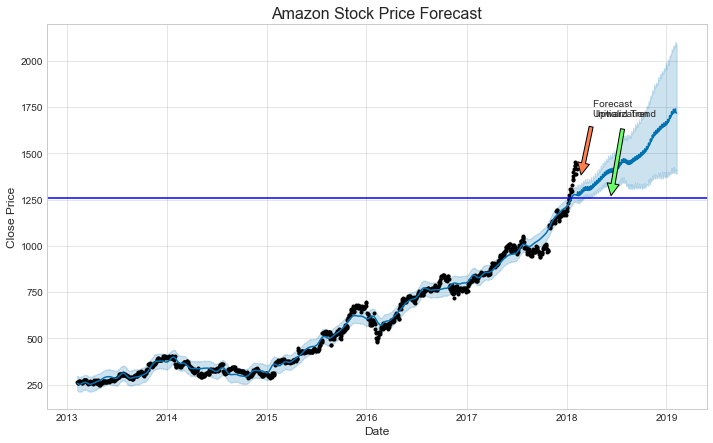

In [45]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn mer Prophet tomorrow and plot the forecast for amazon
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Amazon Stock Price Forecast", fontsize = 16)
ax1.set_xlabel("Date", fontsize = 12)
ax1.set_ylabel("Close Price", fontsize = 12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1, 1700),
             arrowprops=dict(facecolor='#ff7f50', shrink=0.1),)    # 표에서 Forecast initialization을 적어주고 화살표시를 해준다

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy = (trend_date1, 1225), xytext = (starting_date1, 1700), 
             arrowprops=dict(facecolor='#6cff6c', shrink = 0.1),)  # 표에서 upward trend를 써주고 화살표를 표시한다.

ax1.axhline(y=1260, color='b', linestyle='-')    # 1260선에서 파란색의 라인을 그려준다. 

plt.show()




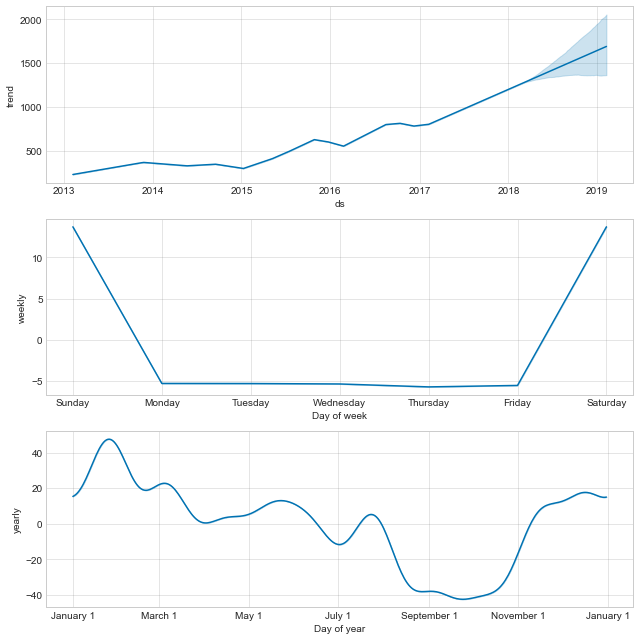

In [46]:
fig2 = m.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


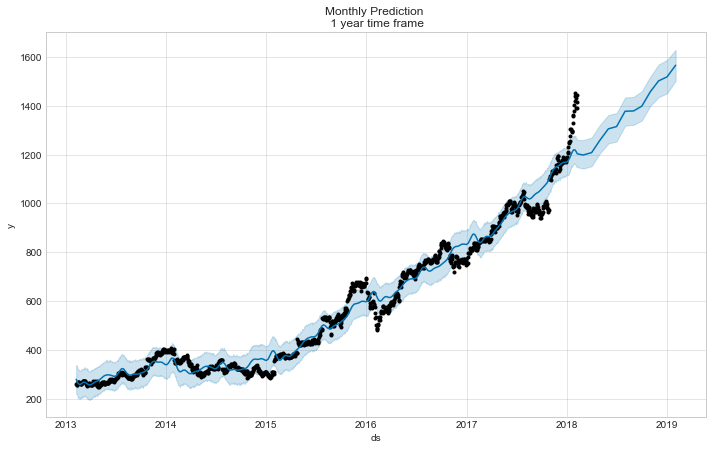

In [47]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title('Monthly Prediction \n 1 year time frame')

plt.show()

### Trends:
- Amazon's stock price is showing signs of upper trend yearly.
- Amazon's stock price show upper trend signs during January (December Sales tend to give a boost to Amazon's stock price)
- There is no weekly trend for stock prices.

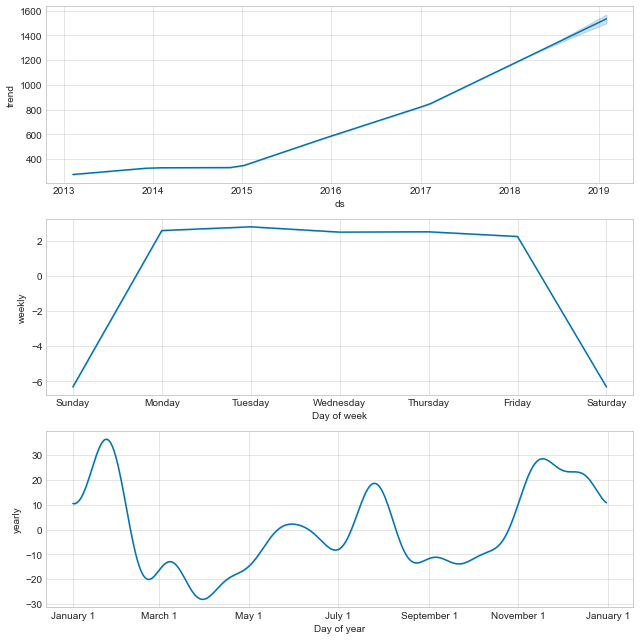

In [48]:
fig = m.plot_components(fcst)
plt.show()

In [49]:
trace = go.Ohlc(x=amzn_df['date'],
               open=amzn_df['open'],
               high=amzn_df['high'],
               low=amzn_df['low'],
               close=amzn_df['close'],
               increasing=dict(line=dict(color='#58FA58')),
               decreasing=dict(line=dict(color='#FA5858')))

layout = {
    # 표 제목
    'title' : 'Amazon Historical Price',    
    # x축 (제목, visible은 하단에 표 생성)
    'xaxis' : {
        'title' : 'Date',
        'rangeslider' : {"visible" : False}},
    # y축
    'yaxis' : {'title' : "Stock Price (USD$)"},
    # 라인
    'shapes' : [{
        'x0' : '2016-12-09', 'x1' : '2016-12-09',
        'y0' : 0, 'y1' : 1, 'xref' : 'paper',
        'line' : {'color' : 'rgb(30,30,30)', 'width' : 1}
    }],
    # 추가 text
    'annotations' : [{
        'x' : '2017-01-20', 'y' : 0.05, 'xref' : 'x', 'yref' : 'paper',
        'showarrow': False, 'xanchor' : 'left',
        'text' : 'President Donald Trump <br> takes Office'
    }]
}


data = [trace]

fig = go.Figure(data=data, layout=layout)   # 표 만들기 go.Figure(data, layout)
iplot(fig, filename='simple_ohlc')     # 표 그리기 ipolt(표)

In [50]:
amzn_df['month_year'] = pd.to_datetime(amzn_df['date']).dt.to_period('M')

# 2017 onwards
last_year = amzn_df.loc[amzn_df['date'].dt.year > 2017]   # 2017년 이후의 데이터
g = last_year.groupby(['date'])
monthly_averages = g.aggregate({'open' : np.mean, 'high' : np.mean, 'low' : np.mean, 'close' : np.mean})
monthly_averages.dtypes

trace = go.Candlestick(x = monthly_averages.index,   # 예시에서는 ['date']이지만 안돼서 index로 묶음
                      open = monthly_averages['open'].values.tolist(),
                      high = monthly_averages['high'].values.tolist(),
                       low = monthly_averages['low'].values.tolist(),
                       close = monthly_averages['close'].values.tolist(),
                       increasing = dict(line = dict(color = '#58FA58')),
                       decreasing = dict(line = dict(color = '#FA5858'))
                      )

layout = {
    'title' : 'Amazon Historical Price <br> <i>A closer look to the upward trend </i>',
    'xaxis' : {
       'title' : 'Date',
        'rangeslider' : {'visible' : False}
    },
    'yaxis' : {'title' : 'Stock Price (USD$)'}
}

data = [trace]

fig = go.Figure(data=data, layout = layout)
iplot(fig, filename = 'simple_ohlc')

In [51]:
amzn_df.head()

,date,open,high,low,close,volume,Ticks,month_year
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,2013-02
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,2013-02
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,2013-02
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2013-02
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,2013-02


In [52]:
# Moving Averages (10, 50 and 200)
amzn_df['10_d_avg'] = amzn_df.close.rolling(window = 10).mean()  # 10일 이동평균선
amzn_df['50_d_avg'] = amzn_df.close.rolling(window = 50).mean()  # 50일 이동평균선
amzn_df['200_d_avg'] = amzn_df.close.rolling(window = 200).mean()# 200일 이동평균선
close_p = amzn_df['close'].values.tolist()   # 아마존의 'close' 값을 리스트로 변환!

# Variable to lnsert into plotly
ten_d = amzn_df['10_d_avg'].values.tolist()
fifty_d = amzn_df['50_d_avg'].values.tolist()
twoh_d = amzn_df['200_d_avg'].values.tolist()
date = amzn_df['date'].values.tolist()

# Set date as index
amzn_df = amzn_df.set_index('date')

In [53]:
fig = tls.make_subplots(rows=2, cols=1, shared_xaxes=True) # 서브플롯

colors = ['#ff4500', '#92a1cf', '#6E6E6E']
avgs = ['10_d_avg', '50_d_avg', '200_d_avg']
# for i,c in zip(range(n),color):
#    ax1.plot(x, y,c=c)

for col, c in zip(avgs, colors):
    fig.append_trace({'x': amzn_df.index, 'y': amzn_df[col], 'type': 'scatter', 'name': col, 'line': {'color': c}}, 1, 1)
for col in ['close']:
    fig.append_trace({'x': amzn_df.index, 'y': amzn_df[col], 'type': 'scatter', 'name': 'Closing Price', 'line':{'color': '#01DF3A'}}, 2, 1)
    
fig['layout'].update(height=800,title='Relationship between MAs <br> and Closing Price',
                    paper_bgcolor='#F2DFCE', plot_bgcolor='#F2DFCE')
    
iplot(fig, filename='pandas/mixed-type subplots')

In [60]:
# take off the date index
amzn_df = amzn_df.reset_index()

# plotly
trace0 = go.Scatter(
    x = amzn_df['date'],
    y = ten_d,
    name = '10-day MA',
    line = dict(
        color = ("#ff6347"),
        width = 4
    )
)
trace1 = go.Scatter(
    x = amzn_df['date'],
    y = fifty_d,
    name = '50-day MA',
    line = dict(
        color = ('#92a1cf'),
        width = 4,
        dash = 'dot'
    )
)
trace2 = go.Scatter(
    x = amzn_df['date'],
    y = twoh_d,
    name = '200-day MA',
    line = dict(
        color = ('#2EF688'),
        width = 4,
        dash = 'dash'
    )
)

data = [trace0, trace1, trace2]

# Edit the layout
layout = dict(title = 'Moving Averages for Amazon',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title ='Price'),
              annotations = [
                  dict(
                      x = '2016-01-13',
                      y = 657,
                      xref = 'x',
                      yref = 'y',
                      text = '<i> First major decline <br> after 10-d crosses <br> 50-d moving average </i>',
                      showarrow = True,
                      arrowhead = 5,
                      ax = 5,
                      ay = -50
                  ), dict(
                        x = '2016-02-24',
                        y = 535,
                      text = '<i> Upward trend after <br> 10-day crosses <br> 200-day moving average </i>',
                      textangle = 0,
                      ax = 50,
                      ay = 50,
                      fonr = dict(
                      color = 'black',
                      size = 12  
                      )
                  )
              ],
                  paper_bgcolor = '#FFF9F5',
                  plot_bgcolor = "#FFF9F5"
             )

fig = dict(data = data, layout = layout)
iplot(fig, filename = 'styled-line')

ValueError: cannot insert level_0, already exists